<a href="https://colab.research.google.com/github/ebrahimElsharkwy/Projects/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import  accuracy_score

Data Collection and processing

In [ ]:
#loading dataset 
loan_dataset = pd.read_csv('/train_u6lujuX_CVtuZ9i (1).csv')

In [ ]:
loan_dataset.head()
print('The Data Shape is :', loan_dataset.shape)

The Data Shape is : (614, 13)


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
type(loan_dataset) # to tell you the type of data

pandas.core.frame.DataFrame

In [ ]:
# some statistics
loan_dataset.describe() #this data are printed only for numerical values

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#finding nulls
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Dorp Missing Values(and this lead to drop the entire row)
loan_dataset = loan_dataset.dropna()

In [ ]:
#Make sure thier are NO Missing Values
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Label Encoding
loan_dataset.replace({"Loan_Status" : {"N" : 0, "Y" : 1}}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
#Dependents column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# Replacing the +3 to 4
loan_dataset =  loan_dataset.replace(to_replace = '3+', value = 4)

In [ ]:
#Dependents column values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualiation

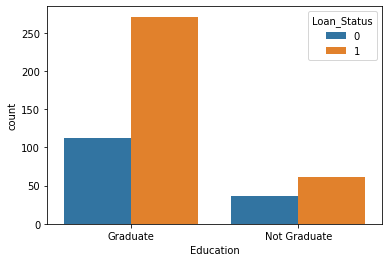

In [ ]:
#Education & loant status
sns.countplot(x='Education', hue='Loan_Status',data=loan_dataset)

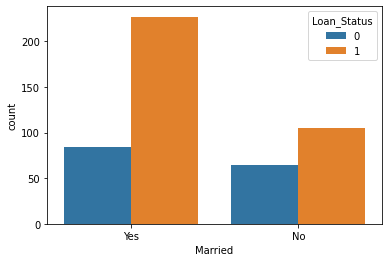

In [ ]:
#Married & loan status
sns.countplot(x='Married', hue='Loan_Status',data=loan_dataset)

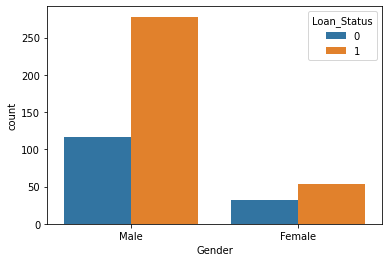

In [ ]:
#Gender & loan status
sns.countplot(x='Gender', hue='Loan_Status',data=loan_dataset)

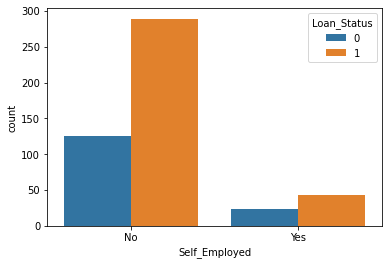

In [ ]:
#Self_Employed	 & loan status
sns.countplot(x='Self_Employed', hue='Loan_Status',data=loan_dataset)

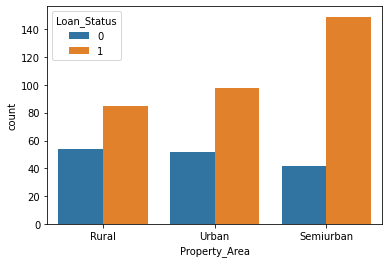

In [ ]:
#Property_Area	 & loan status
sns.countplot(x='Property_Area', hue='Loan_Status',data=loan_dataset)

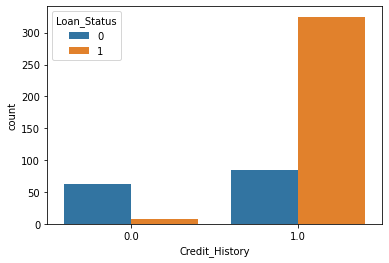

In [ ]:
#Credit_History	 & loan status
sns.countplot(x='Credit_History', hue='Loan_Status',data=loan_dataset)

In [ ]:
# Convert Catogerical columns to numerical
loan_dataset = loan_dataset.replace({'Married' : {'Yes' : 1, 'No' : 0}, 
                                     'Gender' : {'Male' : 1, 'Female' : 0},
                                     'Education' : {'Graduate' : 1, 'Not Graduate' : 0},
                                     'Self_Employed' : {'Yes' : 1, 'No' : 0},
                                     'Property_Area' : {'Rural' : 0, 'Urban' : 1, 'Semiurban' : 2}})

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
# Spearating data & label 
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']
print(X, Y)


     Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              1
3         1        1  ...            1.0              1
4         1        0  ...            1.0              1
5         1        1  ...            1.0              1
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              1
612       1        1  ...            1.0              1
613       0        0  ...            0.0              2

[480 rows x 11 columns] 1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [ ]:
#Splitting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22)

Training the Model BY SVM 

In [ ]:
SVMModel = svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# training the data
SVMModel.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluation 

In [ ]:
# Model Score
train_score = SVMModel.score(X_train,Y_train)
print('The Train Score is :', train_score)
test_score = SVMModel.score(X_test,Y_test)
print('The Test Score is :', test_score)

The Train Score is : 0.7700534759358288
The Test Score is : 0.7735849056603774


In [ ]:
#Model prediction
train_Model_prediction = SVMModel.predict(X_train)
test_Model_prediction = SVMModel.predict(X_test)

In [ ]:
#Accuracy Score on traing data
train_accuracy = accuracy_score(train_Model_prediction, Y_train)
print('The Train Accuracy Score is :', train_accuracy)
#Accuracy Score on test data
test_accuracy = accuracy_score(test_Model_prediction, Y_test)
print('The Train Accuracy Score is :', test_accuracy)

The Train Accuracy Score is : 0.7700534759358288
The Train Accuracy Score is : 0.7735849056603774


Making A Predictive System

In [ ]:
data_to_predict = X_test
make_prediction = SVMModel.predict(data_to_predict)
print('The Predictied Data is :', make_prediction)
real_data = Y_test
print('The Real Data is :', real_data)

The Predictied Data is : [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
The Real Data is : 539    1
191    0
264    1
414    0
606    1
      ..
564    0
424    1
475    1
119    1
439    1
Name: Loan_Status, Length: 106, dtype: int64
